## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [261]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [262]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [263]:
num_rows = df.shape[0]
print(f'The dataset contains {num_rows} rows.')

The dataset contains 294478 rows.


c. The number of unique users in the dataset.

In [264]:
# number of unique users in the dataset.
num_unique_users = df['user_id'].nunique()
print(f'The dataset contains {num_unique_users} unique users.')

# number of users in the control and treatment groups.
num_control_users = df[df['group'] == 'control']['user_id'].nunique()
num_treatment_users = df[df['group'] == 'treatment']['user_id'].nunique()
print(f'The control group has {num_control_users} users and the treatment group has {num_treatment_users} users.')

The dataset contains 290584 unique users.
The control group has 146195 users and the treatment group has 146284 users.


d. The proportion of users converted.

In [265]:
# proportion of users converted
num_converted_users = df[df['converted'] == 1]['user_id'].nunique()
proportion_converted = num_converted_users / num_unique_users
print(f'The proportion of users converted is {proportion_converted:.2%}.')

# proportion of users converted in the control and treatment groups
num_control_converted = df[(df['group'] == 'control') & (df['converted'] == 1)]['user_id'].nunique()
num_treatment_converted = df[(df['group'] == 'treatment') & (df['converted'] == 1)]['user_id'].nunique()
proportion_control_converted = num_control_converted / num_control_users
proportion_treatment_converted = num_treatment_converted / num_treatment_users
print(f'The proportion of users converted in the control group is {proportion_control_converted:.2%} and in the treatment group is {proportion_treatment_converted:.2%}.')

The proportion of users converted is 12.10%.
The proportion of users converted in the control group is 12.11% and in the treatment group is 11.96%.


e. The number of times the `new_page` and `treatment` don't line up.

In [266]:
# The number of times the `new_page` and `treatment` don't line up.
mismatched_new_page = df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')].shape[0]
print(f"Rows where new_page doesn't align with treatment: {mismatched_new_page}")

Rows where new_page doesn't align with treatment: 1928


f. Do any of the rows have missing values?

In [267]:
# Checking null values?
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

if (missing_values > 0).any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")


Missing values in each column:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
There are no missing values in the dataset.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [268]:
# Get the rows where treatment is not aligned with new_page or control is not aligned with old_page
mismatched_treatment = df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')]
mismatched_control = df[(df['landing_page'] == 'old_page') & (df['group'] != 'control')]
df22 = pd.concat([mismatched_treatment, mismatched_control])

In [269]:
# Get the rows where treatment is aligned with new_page or control is aligned with old_page
matched_treatment = df[(df['landing_page'] == 'new_page') & (df['group'] == 'treatment')]
matched_control = df[(df['landing_page'] == 'old_page') & (df['group'] == 'control')]
df2 = pd.concat([matched_treatment, matched_control])

In [270]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [271]:
num_unique_users_df2 = df2['user_id'].nunique()
print(f'The dataset contains {num_unique_users_df2} unique users.')


The dataset contains 290584 unique users.


b. There is one **user_id** repeated in **df2**.  What is it?

In [272]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [273]:
df2[df2.duplicated(['user_id'], keep=False)].drop_duplicates(['user_id'])

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [274]:
df2 = df2[~df2.duplicated(['user_id'], keep='first')]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [275]:
# what is the probability of an individual converting regardless of the page they receive?
# get all those converted
all_converted = df2[df2['converted'] == 1]

# get the number of unique users who converted
converted_users = all_converted['user_id'].nunique()

# calculate the probability
probability = converted_users / num_unique_users_df2

print(f"Probability of converting: {probability: .2%}")

Probability of converting:  11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [276]:
control_converted = df2[(df2['converted'] == 1) & (df2['group'] == 'control')]
num_control_users = df2[df2['group'] == 'control']['user_id'].nunique()
prob_control = control_converted['user_id'].nunique() / num_control_users
print(f"Probability of converting in control group: {prob_control: .2%}")

Probability of converting in control group:  12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [277]:
treatment_converted = df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')]
num_treatment_users = df2[df2['group'] == 'treatment']['user_id'].nunique()
prob_treatment = treatment_converted['user_id'].nunique() / num_treatment_users
print(f"Probability of converting in treatment group: {prob_treatment: .2%}")

Probability of converting in treatment group:  11.88%


d. What is the probability that an individual received the new page?

In [278]:
# What is the probability that an individual received the new page?
prob_new_page = df2[df2['landing_page'] == 'new_page']['user_id'].nunique() / num_unique_users_df2
print(f"Probability of receiving the new page: {prob_new_page: .2%}")

Probability of receiving the new page:  50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the results above, there is **not** sufficient evidence to say that the new treatment page leads to more conversions.

The probabilities of conversion for both the control and treatment groups are very similar, and the overall conversion rate does not show a significant difference between users who received the new page and those who received the old page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis ($H_0$):** The conversion rate for the new page is less than or equal to the conversion rate for the old page.
$$
H_0: p_{new} \leq p_{old}
$$

**Alternative Hypothesis ($H_1$):** The conversion rate for the new page is greater than the conversion rate for the old page.
$$
H_1: p_{new} > p_{old}
$$

In words:
- **Null:** The new page does not lead to more conversions than the old page.
- **Alternative:** The new page leads to more conversions than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [279]:
# Get the overall conversion rate under the null
p_null = df2['converted'].mean()
print(f"Convert rate for p_null under the null: {p_null:.2%}")

# Get sample sizes for new and old pages
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
print(f"Sample size for new page: {n_new}, Sample size for old page: {n_old}")

# Simulate 10,000 samples for new and old pages
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_null) / n_new
    old_page_converted = np.random.binomial(n_old, p_null) / n_old
    p_diffs.append(new_page_converted - old_page_converted)

# Convert to numpy array for further analysis
p_diffs = np.array(p_diffs)
print(f"Mean of p_diffs: {np.mean(p_diffs):.4f}")

Convert rate for p_null under the null: 11.96%
Sample size for new page: 145310, Sample size for old page: 145274
Mean of p_diffs: -0.0000


a. What is the **convert rate** for $p_{new}$ under the null? 

In [280]:
print(f"Convert rate for p_new under the null: {p_null:.2%}")

Convert rate for p_new under the null: 11.96%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [281]:
print(f"Convert rate for p_old under the null: {p_null:.2%}")

Convert rate for p_old under the null: 11.96%


c. What is $n_{new}$?

In [282]:
print(f"Sample size for new page: {n_new}")

Sample size for new page: 145310


d. What is $n_{old}$?

In [283]:
print(f"Sample size for old page: {n_old}")

Sample size for old page: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [284]:
# Simulate n_new transactions with a convert rate of p_new under the null. Store these n_new 1's and 0's in new_page_converted
new_page_converted = np.random.binomial(1, p_null, size=n_new)
new_page_converted

num_ones = np.sum(new_page_converted)
num_zeros = len(new_page_converted) - num_ones
proportion_ones = num_ones / len(new_page_converted)

print(f"Quantidade de 1's: {num_ones}")
print(f"Quantidade de 0's: {num_zeros}")
print(f"Proporção de 1's: {proportion_ones:.4f} ou {proportion_ones:.2%}")

Quantidade de 1's: 17302
Quantidade de 0's: 128008
Proporção de 1's: 0.1191 ou 11.91%


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [285]:
# Simulate n_old transactions with a convert rate of p_new under the null. Store these n_old 1's and 0's in old_page_converted
old_page_converted = np.random.binomial(1, p_null, size=n_old)
old_page_converted

num_ones = np.sum(old_page_converted)
num_zeros = len(old_page_converted) - num_ones
proportion_ones = num_ones / len(old_page_converted)

print(f"Quantidade de 1's: {num_ones}")
print(f"Quantidade de 0's: {num_zeros}")
print(f"Proporção de 1's: {proportion_ones:.4f} ou {proportion_ones:.2%}")

Quantidade de 1's: 17270
Quantidade de 0's: 128004
Proporção de 1's: 0.1189 ou 11.89%


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [286]:
p_new = np.mean(new_page_converted)
p_old = np.mean(old_page_converted)
print(f"p_new - p_old: {p_new - p_old:.4f}")

p_new - p_old: 0.0002


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [287]:
# Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_null) / n_new
    old_page_converted = np.random.binomial(n_old, p_null) / n_old
    p_diffs.append(new_page_converted - old_page_converted)

# Convert to numpy array for further analysis
p_diffs = np.array(p_diffs)
print(f"Mean of p_diffs: {np.mean(p_diffs):.4f}")

Mean of p_diffs: 0.0000


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

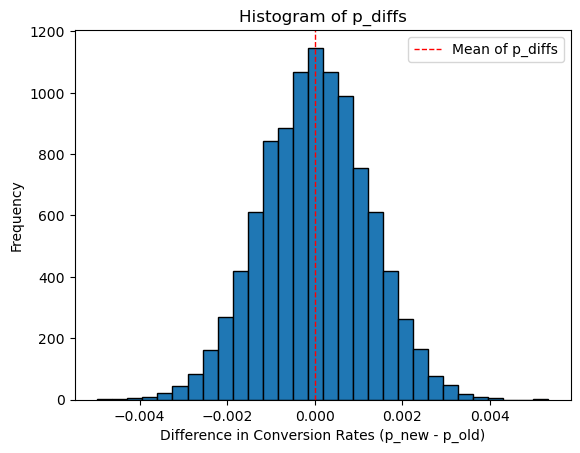

In [288]:
plt.hist(p_diffs, bins=30, edgecolor='black')
plt.title('Histogram of p_diffs')
plt.xlabel('Difference in Conversion Rates (p_new - p_old)')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(p_diffs), color='red', linestyle='dashed', linewidth=1, label='Mean of p_diffs')
plt.legend()
plt.show()

The histogram of `p_diffs` shows the sampling distribution of the difference in conversion rates ($p_{new} - p_{old}$) under the **null hypothesis**.

### What does it represent?

Each value in `p_diffs` is the result of one simulation where I randomly assign conversions to the new and old pages, assuming both have the same true conversion rate (`p_null`).
The histogram shows how these simulated differences are distributed when there is no real difference between the pages.

### Matching problem analogy

Above I simulate what would happen by chance if there is no effect (no difference between groups). The histogram answers:

"If the new and old pages are equally effective, what kind of differences in conversion rates might we see just by random variation?"

#### What should you expect?

The histogram should be centered around zero (since, under the null, the expected difference is zero).
The spread (width) of the histogram shows the natural variability in the difference due to random sampling.
Observed difference (from the real data) falls far in the tail of this histogram, it suggests the observed result is unlikely under the null.

### In summary:

The histogram of `p_diffs` visualizes the range of differences you could expect to see by chance alone, if there is truly no difference between the new and old pages. This is the basis for calculating a `p-value` and making statistical inferences.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [289]:
# What proportion of the **p_diffs** are greater than the actual difference observed in ab_data.csv
actual_diff = df2[df2['landing_page'] == 'new_page']['converted'].mean() - df2[df2['landing_page'] == 'old_page']['converted'].mean()
p_diffs_greater = np.sum(p_diffs > actual_diff) / len(p_diffs)
print(f"Proportion of p_diffs greater than actual difference: {p_diffs_greater:.4f}")

Proportion of p_diffs greater than actual difference: 0.9042


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This value is called the `p-value` in scientific studies.

It represents the probability of observing a difference in conversion rates between the new and old pages **as large as or larger than the one actually observed, assuming that there is no real difference** between the pages (i.e., the null hypothesis is true).

#### Interpretation:

If the `p-value` is **small (typically less than 0.05)**, it suggests that the observed difference is **unlikely to have occurred by chance**, and we may have evidence to reject the null hypothesis.
If the `p-value` is **large**, it means the observed difference could **easily occur by random chance**, so we do not have enough evidence to say there is a significant difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [290]:
# Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.
# Use `statsmodels.api` to perform the calculations.

import statsmodels.api as sm

convert_old = sm.stats.proportion_confint(
    count=df2[df2['landing_page'] == 'old_page']['converted'].sum(),
    nobs=df2[df2['landing_page'] == 'old_page'].shape[0],
    alpha=0.05,
    method='normal'
)
convert_new = sm.stats.proportion_confint(
    count=df2[df2['landing_page'] == 'new_page']['converted'].sum(),
    nobs=df2[df2['landing_page'] == 'new_page'].shape[0],
    alpha=0.05,
    method='normal'
)
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0] 

print(f"Conversions for old page: {convert_old[0]*100:.2f}% to {convert_old[1]*100:.2f}%")
print(f"Conversions for new page: {convert_new[0]*100:.2f}% to {convert_new[1]*100:.2f}%")

Conversions for old page: 11.87% to 12.21%
Conversions for new page: 11.71% to 12.05%


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [291]:
# Now use `stats.proportions_ztest` to compute your test statistic and p-value.
from statsmodels.stats.proportion import proportions_ztest
z_stat, p_value = proportions_ztest(
    count=[df2[df2['landing_page'] == 'old_page']['converted'].sum(),
           df2[df2['landing_page'] == 'new_page']['converted'].sum()],
    nobs=[n_old, n_new]
)
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4f}")

Z-statistic: 1.3109, P-value: 0.1899


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The `p-value (0.1899)` is much **greater** than the common significance level of **0.05**.
This means we do not have enough evidence to *reject* the *null hypothesis*.
In other words, **there is no statistically significant difference in conversion rates** between the old and new pages.

#### Conclusion:
The new page does not perform significantly better than the old page, so there is no reason (based on this data) to switch to the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**, in my opinion, is appropriate because the outcome variable (`converted`) is binary (1 for conversion, 0 for no conversion). This type of regression models the probability of conversion as a function of the predictors.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [292]:
# Add intercept column
df2['intercept'] = 1

# Create dummy variable: ab_page = 1 if treatment (new_page), 0 if control (old_page)
df2['ab_page'] = np.where(df2['group'] == 'treatment', 1, 0)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [293]:
# Define the independent variables (predictors)
X = df2[['intercept', 'ab_page']]

# Define the dependent variable (outcome)
y = df2['converted']

# Fit the logistic regression model
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [294]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:               8.077e-06
Time:                        14:57:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**intercept**: The log-odds of conversion for the control group (old page).

**ab_page**: The difference in log-odds of conversion between the treatment (new page) and control (old page).
- The coefficient is **-0.0150**, which is very close to zero.
- The **p-value (0.190)** is much greater than `0.05`, so this difference is **not statistically significant**.
Conclusion:
There is no evidence that receiving the new page (`ab_page = 1`) changes the probability of conversion compared to the old page. This agrees with your earlier hypothesis test results.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors in your regression model because:

- **Improved accuracy**: Including relevant variables (such as country, device type, time of day, etc.) can help explain more of the variation in conversion rates, leading to more accurate and meaningful results.
- **Control for confounding**: Other factors may influence conversion. By including them, you can isolate the effect of the page type and avoid biased estimates.
- **Better understanding**: It helps you understand what drives conversions beyond just the treatment/control variable.

**Disadvantages:**

- **Overfitting**: Adding too many variables, especially irrelevant ones, can make the model fit the noise in your data rather than the true signal.
- **Complexity**: More variables make the model harder to interpret and explain.
- **Multicollinearity**: Highly correlated predictors can make it difficult to determine the individual effect of each variable and can inflate standard errors.

In **summary**, adding relevant factors can improve your model, but you should be careful to avoid unnecessary complexity and overfitting.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [295]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# list all unique countries in the dataset
unique_countries = df_new['country'].unique()
print(f"Unique countries in the dataset: {unique_countries}")

Unique countries in the dataset: ['UK' 'US' 'CA']


In [296]:
### Create the necessary dummy variables

# Assume countries are 'US', 'UK', 'CA'
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])

# Only need two dummies to avoid multicollinearity (drop one, e.g., 'US')
df_new['UK'] = np.where(df_new['country'] == 'UK', 1, 0)
df_new['CA'] = np.where(df_new['country'] == 'CA', 1, 0)

# Define predictors: intercept, ab_page, UK, CA
X = df_new[['intercept', 'ab_page', 'UK', 'CA']]
y = df_new['converted']

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [297]:
### Fit Your Linear Model And Obtain the Results

# Fit logistic regression
logit_mod = sm.Logit(y, X)
results = logit_mod.fit()

# Show summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:               2.323e-05
Time:                        14:57:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.

- **ab_page**: The coefficient is -0.0149 (p = 0.191). This means being in the treatment group (new page) slightly decreases the log-odds of conversion, but this effect is not statistically significant (p > 0.05).
- **UK**: The coefficient is 0.0099 (p = 0.457). This means users from the UK have a very small, non-significant increase in conversion probability compared to the US (the reference group).
- **CA**: The coefficient is -0.0408 (p = 0.130). This means users from Canada have a small, non-significant decrease in conversion probability compared to the US.

Conclusion:

Neither the page type nor the country (UK or CA, compared to US) has a statistically significant effect on conversion. All p-values are much greater than 0.05, so there is no evidence that country impacts conversion in this dataset.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.